In [1]:
""" Snakemake Script. Don't need to import snakemake."""

import pandas as pd
from os.path import dirname, join
import numpy as np
#import click
#import snakemake
from src.utils.data_io import af_to_vireo
from icecream import ic


import seaborn as sns
import matplotlib.pyplot as plt

fig_utils from mplh


In [2]:
cells_meta = "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/v03/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/cells_meta.tsv"
sample = ["Input","Control","Flt3l"]
ref_mt = "/data/Mito_Trace/data/external/chrM_refAllele.txt"

cov = ["/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/Input/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/Input.coverage.txt",
       "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/Control/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/Control.coverage.txt",
       "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/Flt3l/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/Flt3l.coverage.txt"]

mgatk_fs = ["/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/Input/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk",
        "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/Control/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk",
        "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/Flt3l/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk"]

pileup_d = "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/v03/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_init/donor0"
           

# pileup_fs = ["/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/v03/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_init/donor0",
#             "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/v03/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_init/donor1"]

# var_type="init"


# cov = snakemake.input.cov
# output_fs = snakemake.output.af
# cells_meta = snakemake.params.cells_meta
# sample = snakemake.params.sample
# ref_mt = snakemake.params.ref_mt
# var_type=snakemake.params.var_type



In [3]:
cells_meta = pd.read_csv(cells_meta , sep='\t')
#sample = sample.split(',')
ref_fa = pd.read_csv(ref_mt, sep='\t', header=None, index_col=0)

In [4]:
af_pile = pd.read_csv(join(pileup_d, f"af.tsv"), sep="\t", index_col=0)
dp_pile = pd.read_csv(join(pileup_d, f"dp.tsv"), sep="\t", index_col=0)

In [5]:
af_pile

,10397G,11812G,5147A,15452A,11761T,15607G,310C,11719A,10463C,2442C,...,146C,7598A,827G,196C,3847C,16519C,4117C,13368A,16296T,10559G
Cell,,,,,,,,,,,,,,,,,,,,,
AAACGAAAGAATCAGT-1_Control,0.0,1.000000,1.000000,1.0,0.000000,1.000000,0.826087,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.916667,1.0,1.000000
AAACGAAAGCATACCT-1_Control,0.0,1.000000,0.952381,1.0,0.000000,1.000000,0.961538,1.000000,0.962963,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.0,0.913043
AAACGAAAGTACAGTA-1_Control,0.0,1.000000,0.000000,1.0,0.000000,0.933333,1.000000,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.0,1.000000
AAACGAAAGTGTCGGA-1_Control,0.0,0.777778,1.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.0,1.000000
AAACGAAGTCTTAGCA-1_Control,0.0,0.942857,1.000000,1.0,0.000000,1.000000,0.909091,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTCAATGACTC-1_Input,0.0,1.000000,0.978723,1.0,0.056338,1.000000,0.906667,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.986301,1.000000,0.954545,0.0,1.000000
TTTGTGTCAGAAAGAG-1_Input,0.0,1.000000,1.000000,1.0,0.000000,1.000000,0.917355,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.996296,1.000000,1.0,1.000000
TTTGTGTCATAGCCAT-1_Input,0.0,1.000000,1.000000,1.0,0.000000,0.983051,0.903846,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.030303,1.000000,1.000000,1.000000,1.0,1.000000


In [6]:

## Remove high variants

def get_high_variants(df, thresh, pct_thresh):
    """ Remove rows that have an average higher than threshold

    :param df:
    :param thresh:
    :return:
    """
    n_pct = pct_thresh*df.shape[0]
    return df.loc[:,((df>thresh).sum()>n_pct)].columns.values


## Load mgatk results for each condition

0


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


number of donor vars: 26
26
1
number of donor vars: 26
26
2
number of donor vars: 26
26


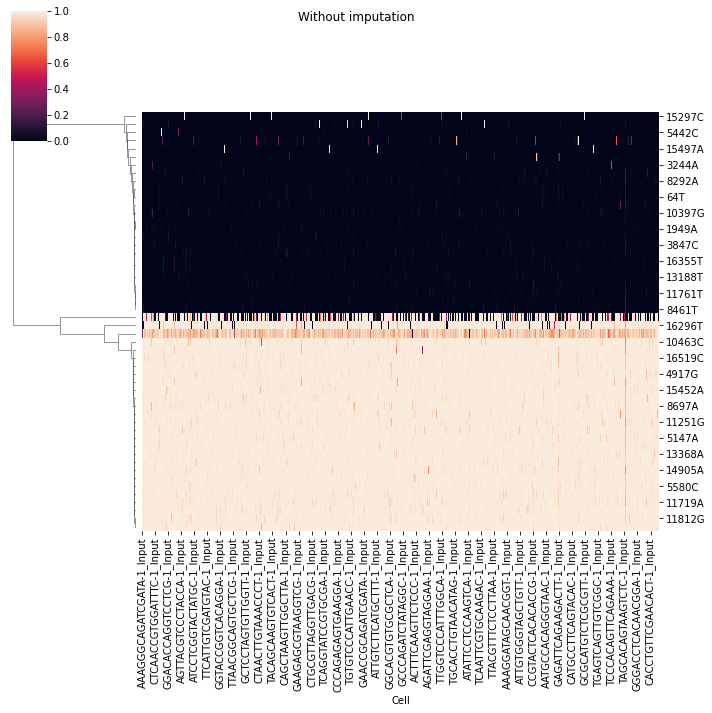

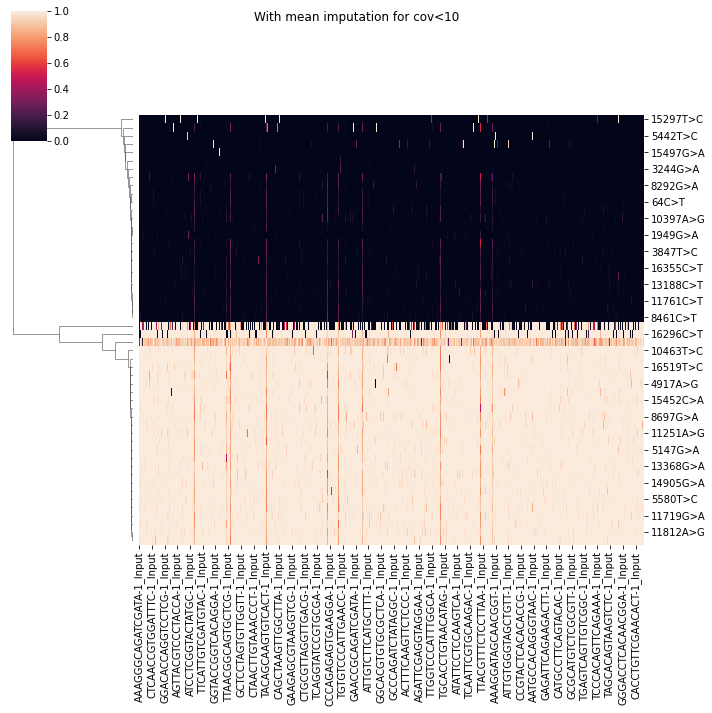

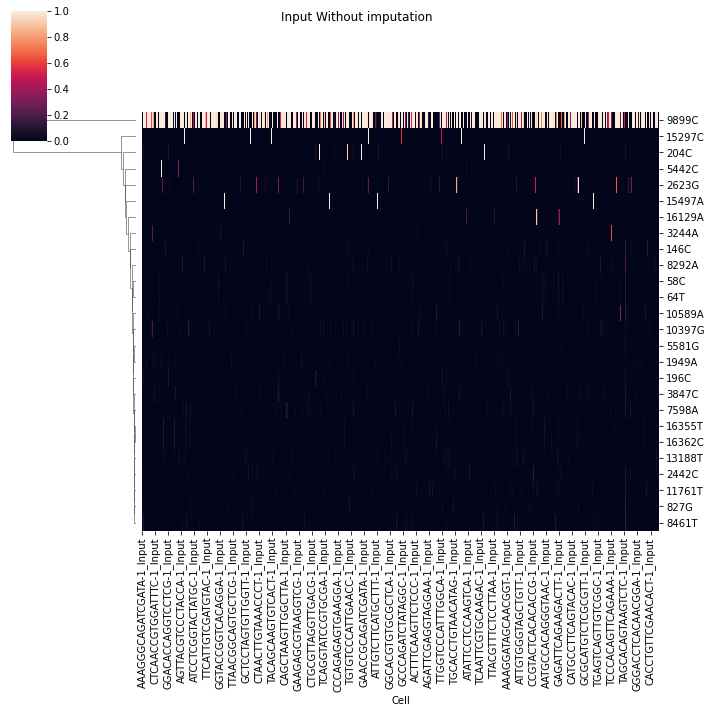

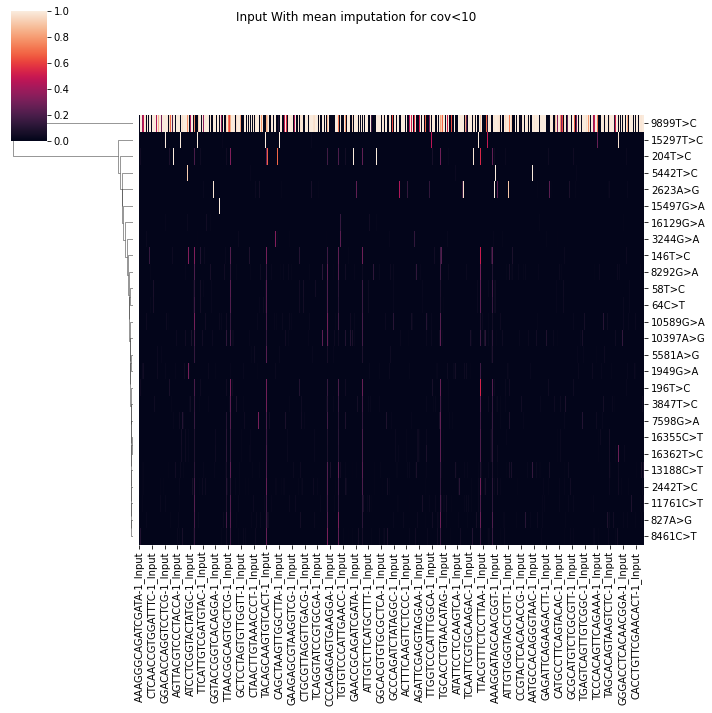

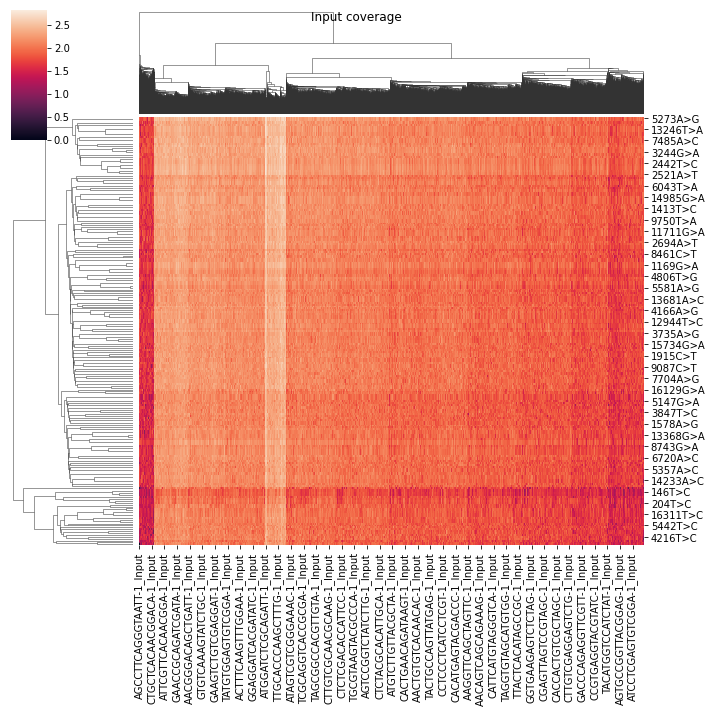

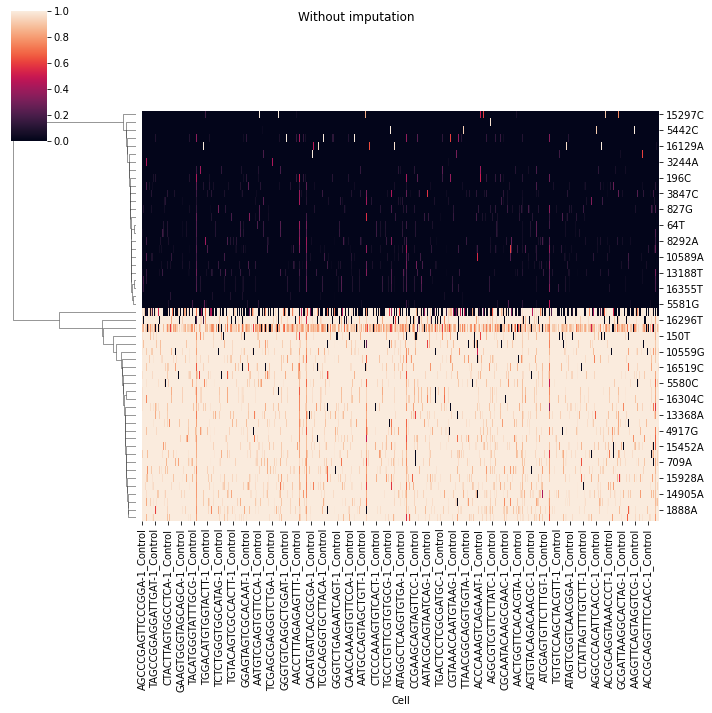

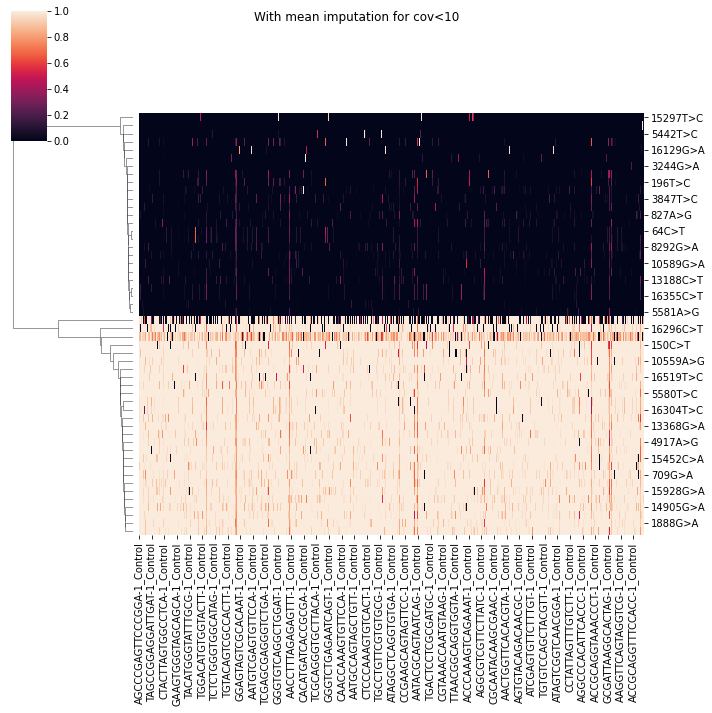

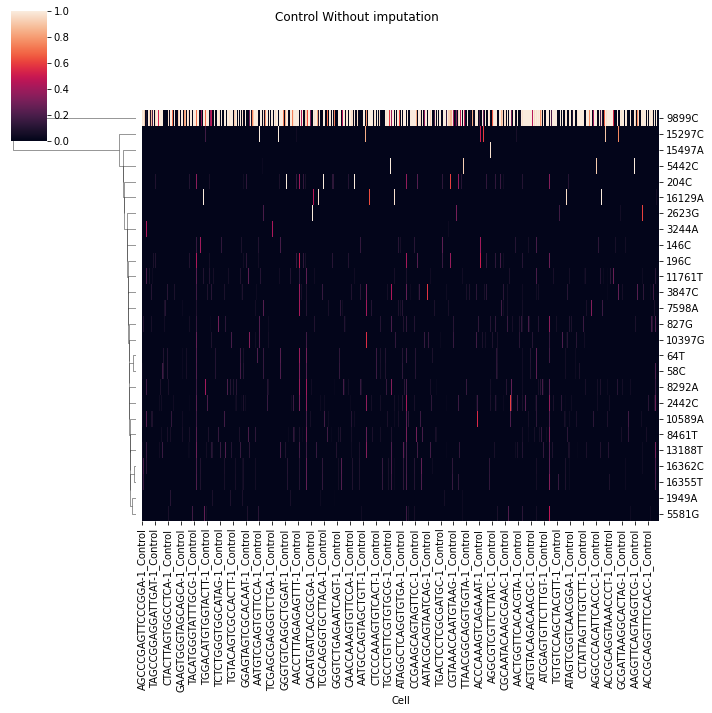

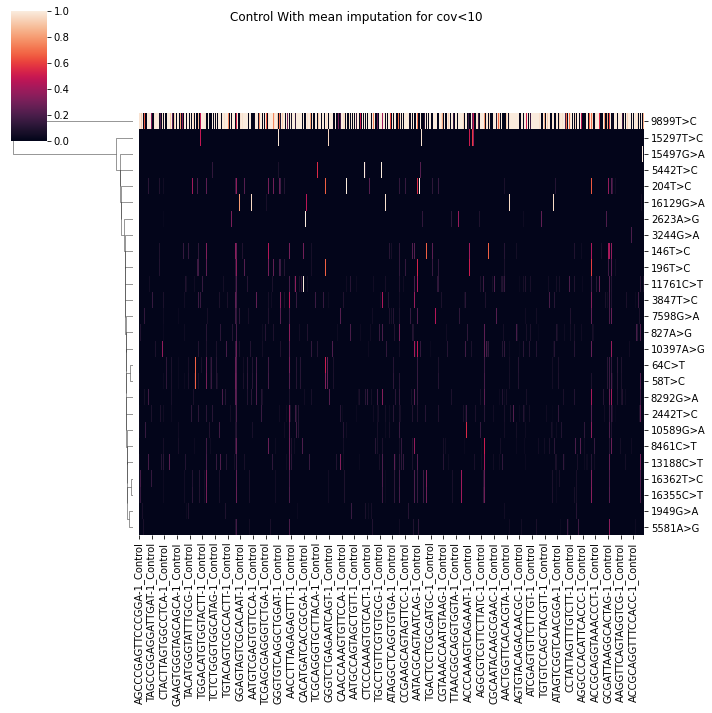

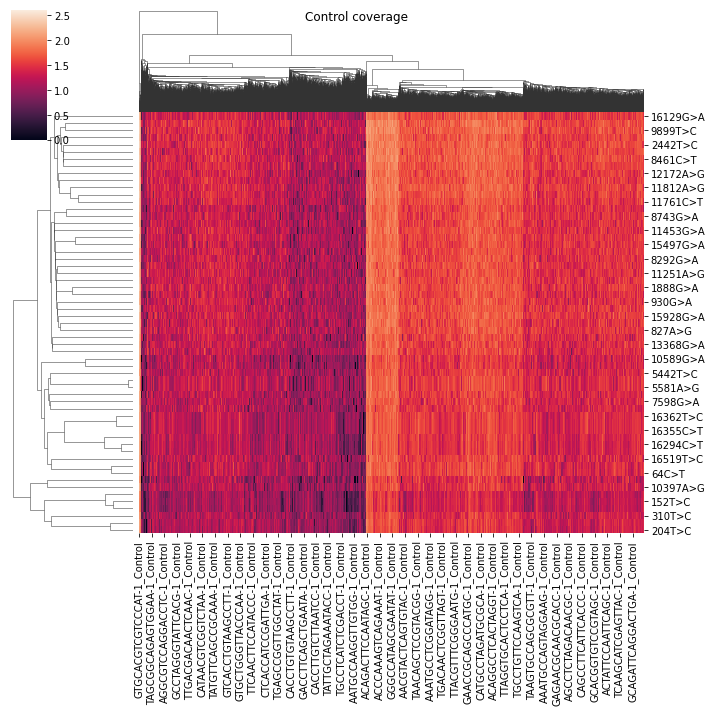

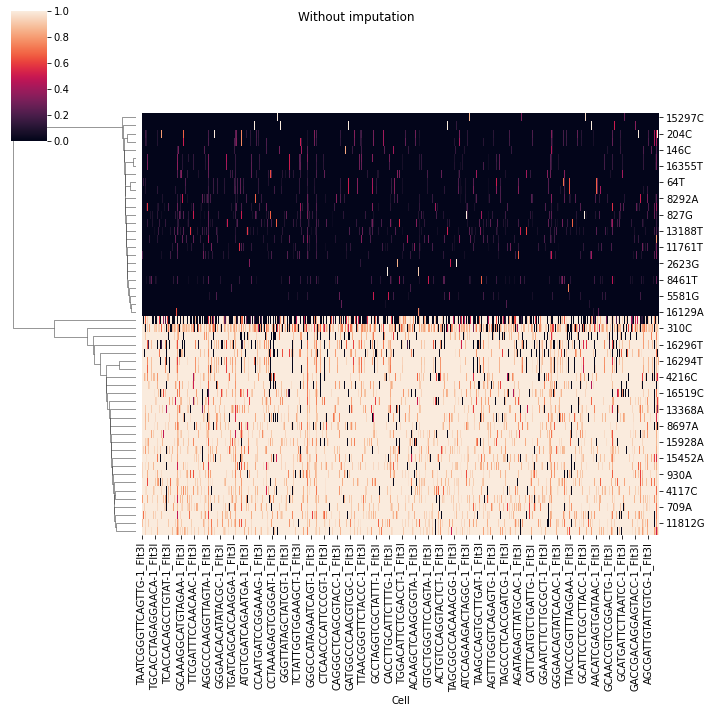

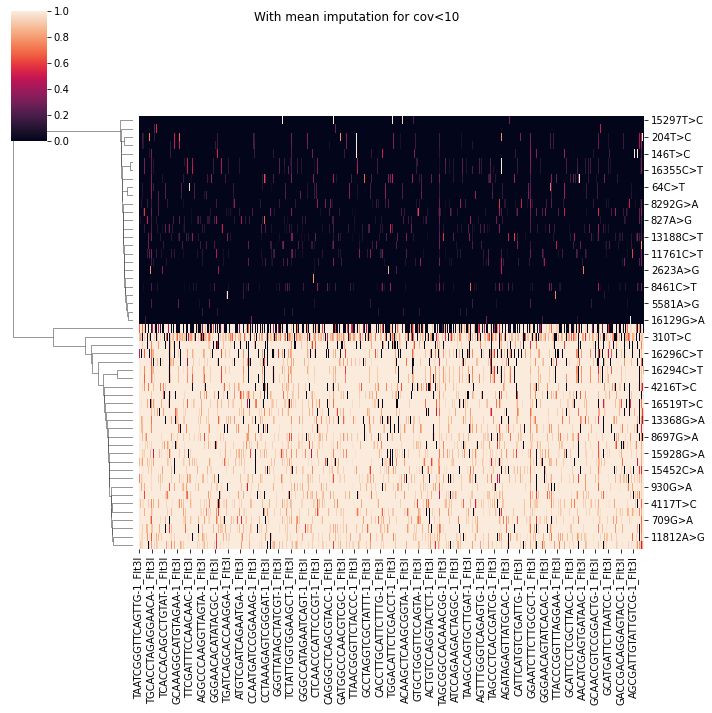

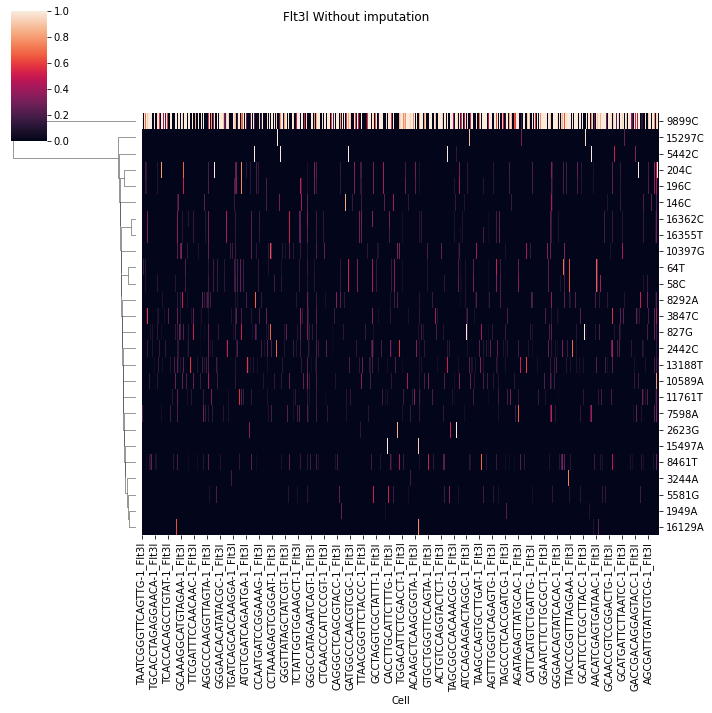

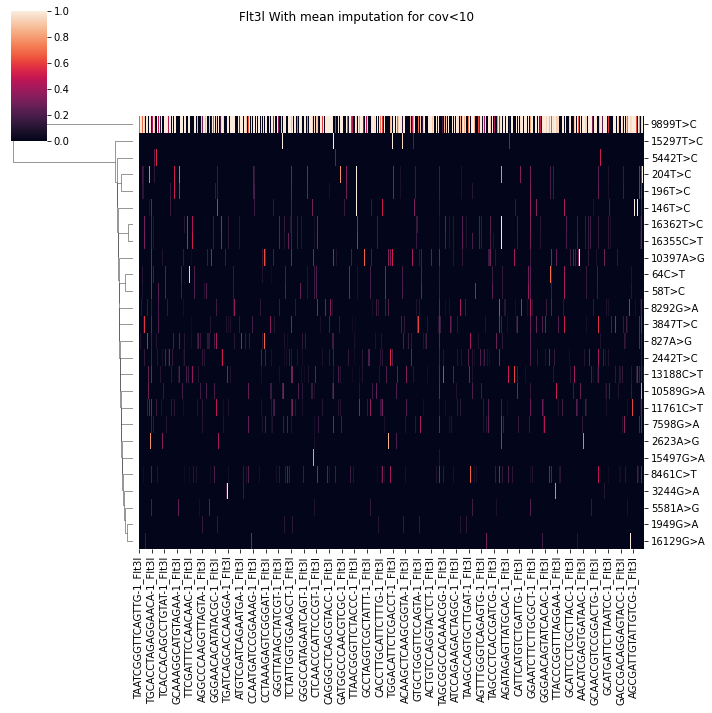

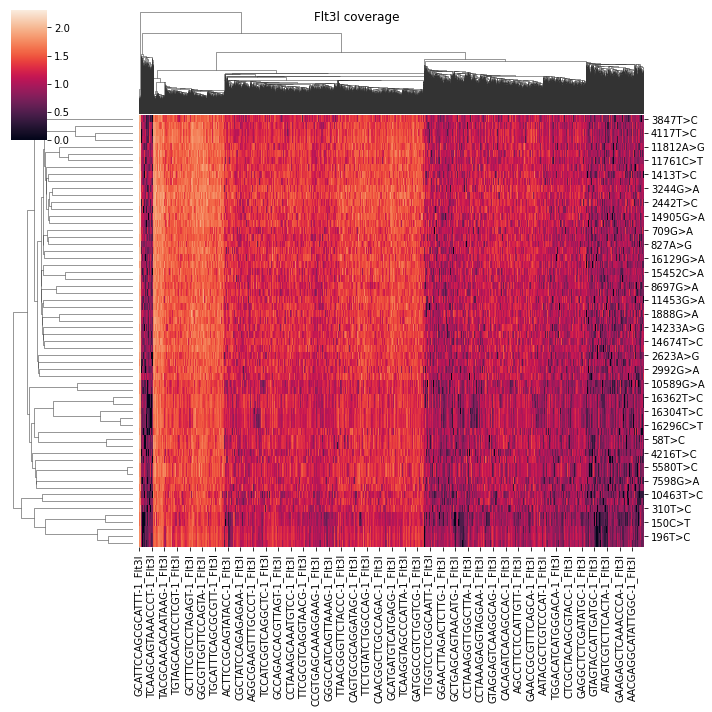

In [7]:
af_mgatk = {}
af = {}
cov = {}
for ind, cond in enumerate(sample):
    print(ind)
    af_mgatk[cond] = pd.read_csv(join(mgatk_fs[ind], f"{cond}.af.mgatk.tsv"), sep="\t")
    af[cond] = pd.read_csv(join(mgatk_fs[ind], f"{cond}.af.tsv"), sep="\t")
    cov[cond] = pd.read_csv(join(mgatk_fs[ind], f"{cond}.coverage.tsv"), sep="\t")
    
    af[cond].columns = [f"{x}_{cond}" for x in af[cond].columns]
    cov[cond].columns = [f"{x}_{cond}" for x in cov[cond].columns]

    ## Run for each condition
    vars_to_keep = []
    for val in af_mgatk:
        vars_to_keep.extend(af_mgatk[cond].index.values)
    vars_to_keep=list(set(vars_to_keep))
    vars_to_keep

    ## Change variant to remove '{ref}>'
    vars_to_keep_pile = []
    for v in vars_to_keep:
        curr = v.split(">")
        name = f"{curr[0][:-1]}{curr[1]}"
        vars_to_keep_pile.append(name)
    vars_to_keep_pile = vars_to_keep_pile
    vars_to_keep_pile

    overlap_vars_to_keep_pile = []
    overlap_vars_to_keep = []
    for ind, v in enumerate(vars_to_keep):
        if v in af[cond].index:
            if vars_to_keep_pile[ind] in af_pile.columns:
                overlap_vars_to_keep_pile.append(vars_to_keep_pile[ind])
                overlap_vars_to_keep.append(v)

    ## With just overlap variants

    overlap_cells = set(af[val].columns.values)
    overlap_cells = overlap_cells.intersection(set(af_pile.index.values))
    overlap_cells

    g_pile = sns.clustermap(af_pile.loc[overlap_cells, overlap_vars_to_keep_pile].transpose(), col_cluster=False)
    plt.suptitle("Without imputation")
    #inds = g_pile.dendrogram_row.dendrogram["leaves"]
    #cols = g_pile.dendrogram_col.dendrogram["leaves"]
    g_mgatk = sns.clustermap(af[val].loc[overlap_vars_to_keep, overlap_cells], col_cluster=False)
    plt.suptitle("With mean imputation for cov<10")


    # donor_vars = get_high_variants(af[val].loc[af[val].index.isin(vars_to_keep), :].transpose(), thresh=0.8, pct_thresh=0.4)
    # print(f"number of donor vars: {len(donor_vars)}")

    donor_vars_pile = get_high_variants(af_pile.loc[:, af_pile.columns.isin(vars_to_keep_pile)], thresh=0.8, pct_thresh=0.7)
    print(f"number of donor vars: {len(donor_vars_pile)}")

    donor_vars = []
    for ind, v in enumerate(vars_to_keep_pile): 
        if v in donor_vars_pile:
            donor_vars.append(vars_to_keep[ind])
    print(len(donor_vars))
    donor_vars

    curr_af_pile = af_pile.loc[overlap_cells, overlap_vars_to_keep_pile].transpose()
    curr_af_pile = curr_af_pile.loc[~(curr_af_pile.index.isin(donor_vars_pile)),:]
    #curr_af_pile = curr_af_pile.loc[]
    curr_af = af[val].loc[overlap_vars_to_keep, overlap_cells]
    curr_af = curr_af.loc[~(curr_af.index.isin(donor_vars)), :]

    g_pile = sns.clustermap(curr_af_pile, col_cluster=False)
    plt.suptitle(f"{cond} Without imputation")
    inds = g_pile.dendrogram_row.dendrogram["leaves"]
    #cols = g_pile.dendrogram_col.dendrogram["leaves"]
    g_mgatk = sns.clustermap(curr_af.iloc[inds], col_cluster=False)
    plt.suptitle(f"{cond} With mean imputation for cov<10")

    sns.clustermap(np.log10(1+cov[cond]))
    plt.suptitle(f"{cond} coverage")

## ?Find if it's the imputation.. dont i need to do that per donor? 

## Impute the new data

In [34]:
dp_low_cov = dp_pile < 10
dp_low_cov = dp_low_cov.reset_index().melt(id_vars=["Cell"], var_name="Variant",value_name="low")
dp_low_cov = dp_low_cov[dp_low_cov["low"]]
dp_low_cov

dp_var_group = dp_low_cov.groupby("Variant")


imp_vars = set(dp_low_cov["Variant"].values)
imp_df = af_pile.copy()
for v in imp_vars:
    curr_lowc = dp_var_group.get_group(v)["Cell"].values
    print(sum(af_pile.index.isin(curr_lowc)))
    mean_v = af_pile.loc[~(af_pile.index.isin(curr_lowc)), v].mean()
    print(mean_v)
    print(sum(imp_df.index.isin(curr_lowc)))
    imp_df.loc[imp_df.index.isin(curr_lowc), v] = mean_v


,Cell,Variant,low
3,AAACGAAAGTGTCGGA-1_Control,10397G,True
22,AAAGATGTCGCTCTAC-1_Control,10397G,True
23,AAAGGATAGACTAGCG-1_Control,10397G,True
24,AAAGGATCACAAGTGG-1_Control,10397G,True
36,AAAGGGCTCACAGGGA-1_Control,10397G,True
...,...,...,...
526875,TTGCGGGCATTACCTT-1_Flt3l,9899C,True
526884,TTGCTTAAGCTTACCA-1_Flt3l,9899C,True
526895,TTGGTCCGTCTCTGGG-1_Flt3l,9899C,True
526913,TTTACGTGTAGTATCC-1_Flt3l,9899C,True


In [60]:
imp_df

,10397G,11812G,5147A,15452A,11761T,15607G,310C,11719A,10463C,2442C,...,146C,7598A,827G,196C,3847C,16519C,4117C,13368A,16296T,10559G
Cell,,,,,,,,,,,,,,,,,,,,,
AAACGAAAGAATCAGT-1_Control,0.000000,0.987313,0.988159,1.0,0.000000,1.000000,0.826087,1.000000,1.000000,0.010198,...,0.000000,0.006982,0.008864,0.00000,0.000000,1.000000,1.000000,0.916667,0.922881,1.000000
AAACGAAAGCATACCT-1_Control,0.000000,1.000000,0.952381,1.0,0.000000,1.000000,0.961538,1.000000,0.962963,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,0.913043
AAACGAAAGTACAGTA-1_Control,0.000000,1.000000,0.988159,1.0,0.000000,0.933333,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
AAACGAAAGTGTCGGA-1_Control,0.009293,0.987313,0.988159,1.0,0.009632,1.000000,0.889309,1.000000,0.988879,0.010198,...,0.008198,0.000000,0.008864,0.00754,0.000000,1.000000,0.987458,0.986714,0.922881,0.988884
AAACGAAGTCTTAGCA-1_Control,0.000000,0.942857,1.000000,1.0,0.000000,1.000000,0.909091,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTCAATGACTC-1_Input,0.000000,1.000000,0.978723,1.0,0.056338,1.000000,0.906667,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.986301,1.000000,0.954545,0.000000,1.000000
TTTGTGTCAGAAAGAG-1_Input,0.000000,1.000000,1.000000,1.0,0.000000,1.000000,0.917355,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.996296,1.000000,1.000000,1.000000
TTTGTGTCATAGCCAT-1_Input,0.000000,1.000000,1.000000,1.0,0.000000,0.983051,0.903846,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.030303,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 0.98, 'Flt3l imputation with donor')

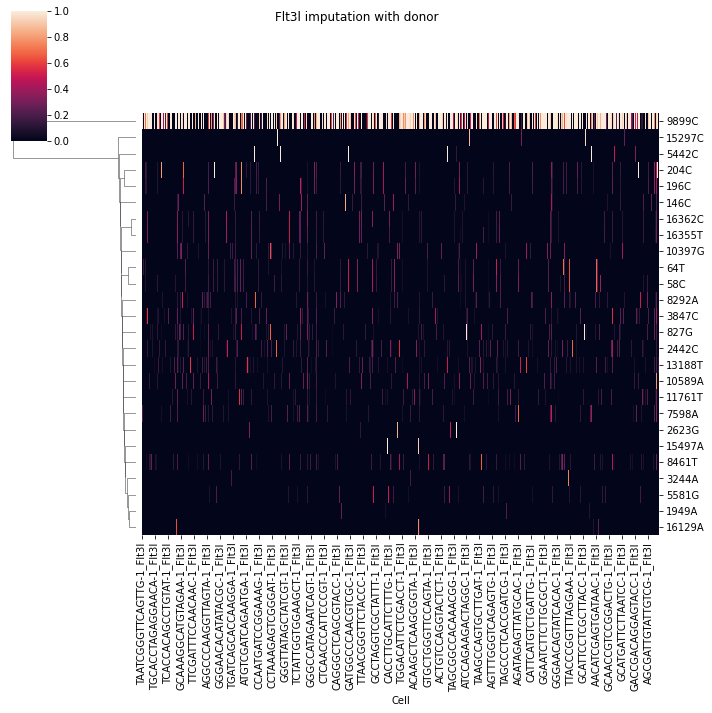

In [65]:
imp_df
curr_af = imp_df.loc[overlap_cells, overlap_vars_to_keep_pile]
#curr_af = curr_af.loc[:, ~(curr_af.columns.isin(donor_vars))]

g_pile = sns.clustermap(curr_af_pile, col_cluster=False)
plt.suptitle(f"{cond} imputation with donor")


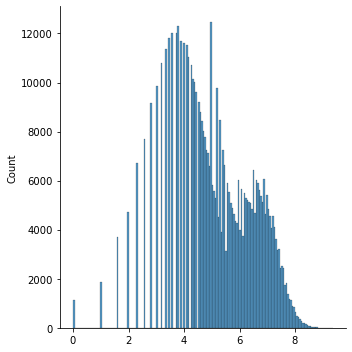

In [58]:
sns.displot(np.log2(1+dp_pile.values.flatten()))

In [8]:
# curr_af_pile = af_pile.loc[overlap_cells, overlap_vars_to_keep_pile].transpose()
# curr_af = af[val].loc[overlap_vars_to_keep, overlap_cells]
# curr_af_pile
# curr_af.index = [f'{x.split(">")[0][:-1]}{x.split(">")[1]}' for x in curr_af.index]
# curr_af

# max_diff = np.abs(curr_af - curr_af_pile).sum(axis=1).sort_values()[::-1]
# max_diff

# f, ax = plt.subplots(figsize=(12,12))
# sns.heatmap(curr_af.loc[max_diff.index[:2]])
# f, ax = plt.subplots(figsize=(12,12))
# sns.heatmap(curr_af_pile.loc[max_diff.index[:2]])



# ## With both variants

# g_pile = sns.clustermap(af_pile.loc[:, af_pile.columns.isin(vars_to_keep_pile)].transpose())

# g_mgatk = sns.clustermap(af[val].loc[af[val].index.isin(vars_to_keep), :])

In [9]:
# for d, curr_donor in cells_meta.groupby('donor'):
#     d = int(d)
#     ic('donor', d)
#     vars_conds = []
#     af_donor_conds = []
#     dp_donor_conds = []

#     # Loop through each condition and filter cells for the donor ones
#     for ind, curr_cov_f in enumerate(cov): #enumerate(snakemake.input.cov):
        
#         ## AF
#         af = pd.read_csv(join(dirname(curr_cov_f), "af_by_cell.tsv"), sep='\t',
#                          header=0, index_col=0) #cells-by-variants
#         condition = sample[ind]
#         ic(condition)
        
#         af.index = af.index + "_" + condition
# #         print('af')
# #         print(af.head())
#         curr_samp_donor_df = curr_donor[curr_donor["condition"] == condition]  # Condition-donors
#         af_donor_samp = af.loc[af.index.isin(curr_samp_donor_df["ID"].values)]
#         ic(af_donor_samp.shape)
#         af_donor_samp = af_donor_samp.loc[((af_donor_samp > 0).sum(axis=1)>10), ((af_donor_samp > 0).sum(axis=0)>10)] #af_donor_samp.loc[(af_donor_samp.sum(axis=1) > 0), (af_donor_samp.sum(axis=0) > 0)]
#         vars_conds.append(set(af_donor_samp.columns))
#         af_donor_conds.append(af_donor_samp)
#         ic(curr_cov_f)
#         ic(af_donor_samp.shape)
#         ## Coverage
#         curr_samp_cov = pd.read_csv(curr_cov_f,
#                                     header=None)  # load sample coverage
#         curr_samp_cov[1] = curr_samp_cov[1] + "_" + sample[ind]
#         curr_samp_cov = curr_samp_cov.loc[
#             curr_samp_cov[1].isin(curr_samp_donor_df["ID"])]
#         curr_samp_cov = curr_samp_cov.rename({1: "Cell", 0: "Position", 2: "Value"}, axis=1).pivot(index="Cell",
#                                                                                                   columns="Position",
#                                                                                                   values="Value")
#         dp_donor_samp = pd.DataFrame(index=af_donor_samp.index, columns=af_donor_samp.columns)

#         def fill_dp(x,y):
#             #print('x', x)
#             #print('y', y.head())
#             return y.loc[y.index.isin(x.index), int(x.name[:-1])].values

#         dp_donor_samp = dp_donor_samp.apply(fill_dp, args=(curr_samp_cov,))

#         print('null dp', dp_donor_samp.isnull().sum().sum())
#         #dp_donor_samp = dp_donor_samp.loc[dp_donor_samp.index.isin(af_donor_samp.index), dp_donor_samp.columns.isin([int(x[:-1] ) for x in af_donor_samp.columns])]
#         dp_donor_conds.append(dp_donor_samp)

#     # Get overlap variants and remove cells/vars with 0s
#     if var_type == "simpleUnion":
#         join_type = "outer"
#         overlap_vars = vars_conds[0].union(*vars_conds)
#     else:
#         join_type="inner"
#         overlap_vars = vars_conds[0].intersection(*vars_conds)
#     print(join_type)
#     #overlap_vars = vars_conds[0].union(*vars_conds)
#     print('overlap_vars', len(overlap_vars))
#     af_donor_df = pd.concat(af_donor_conds, join=join_type, axis=0,
#                                                 ignore_index=False)
#     print('af_donor_df', af_donor_df.shape)
#     af_donor_df = af_donor_df.loc[:, overlap_vars]
#     print('af_donor_df after using overlap vars', af_donor_df.shape)
#     af_donor_df = af_donor_df.loc[(af_donor_df.sum(axis=1)>0), (af_donor_df.sum(axis=0)>0)]
#     print('af_donor_df after 0 removal', af_donor_df.shape)

#     #print('af_donor_df')
#     #print(af_donor_df.head())
#     dp_donor_df = pd.concat(dp_donor_conds, join=join_type, axis=0,
#                                                 ignore_index=False).fillna(0)
#     dp_donor_df = dp_donor_df.loc[dp_donor_df.index.isin(af_donor_df.index), dp_donor_df.columns.isin(af_donor_df.columns)]
#     #print('dp_donor_df')

#     # Save allele + depth matrix + cells_meta
#     af_donor_df.fillna(0).to_csv(join(dirname(output_fs[int(d)]), "af.tsv"),
#                        sep='\t', index=True)
#     dp_donor_df.fillna(0).to_csv(join(dirname(output_fs[int(d)]), "dp.tsv"),
#                        sep='\t', index=True)

#     curr_cells_meta = cells_meta[cells_meta["ID"].isin(af_donor_df.index)].copy()
#     curr_cells_meta.to_csv(join(dirname(output_fs[int(d)]), "cells_meta.tsv"),
#                           sep='\t', index=False)

#     # Create VireoIn
#     # Requires AD sparse matrix
#     af_donor_df = af_donor_df.fillna(0)
#     dp_donor_df = dp_donor_df.fillna(0)
#     af_to_vireo(af_donor_df.transpose(), dp_donor_df.transpose(),
#                 outdir=dirname(output_fs[int(d)]),
#                 out_name="cellSNP")

#     curr_vars = af_donor_df.columns

#     af_meta = pd.DataFrame({"POS": [int(x[:-1]) for x in curr_vars],
#                                                     "ALT": [x[-1] for x in curr_vars],
#                                                     "index": np.arange(1,len(curr_vars)+1),
#                                                     "REF": [f"{ref_fa.loc[int(x[:-1]),1]}{x[:-1]}" for x in curr_vars]
#                                                 }
#                                             )
#     af_meta["#CHROM"] = "MT"
#     af_meta[["#CHROM", "POS", "REF","ALT", "index"]].to_csv(join(dirname(output_fs[d]), "cellSNP.base.vcf"),
#                    sep="\t", index=False)


In [10]:
# print(dp_donor_df.shape)
# dp_donor_df.loc[(dp_donor_df.sum(axis=1)>0), (dp_donor_df.sum(axis=0)>0)].shape
# (dp_donor_df.sum(axis=1) > 1000).sum()

In [11]:
# print(af_donor_df.shape)
# af_donor_df.loc[(af_donor_df.sum(axis=1)>0), (af_donor_df.sum(axis=0)>0)].shape
# (af_donor_df.sum(axis=1) > 0).sum()